<a href="https://colab.research.google.com/github/Anish240104/sales_forcasting_project/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
#  Upload CSV from local system
from google.colab import files
uploaded = files.upload()

#  Load the uploaded CSV file
import io
df = pd.read_csv(io.BytesIO(uploaded['customer_data.csv']))

Saving customer_data.csv to customer_data.csv


In [4]:
# Check dataset shape and info
print("Dataset Shape:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()


Dataset Shape: (200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


,0
CustomerID,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


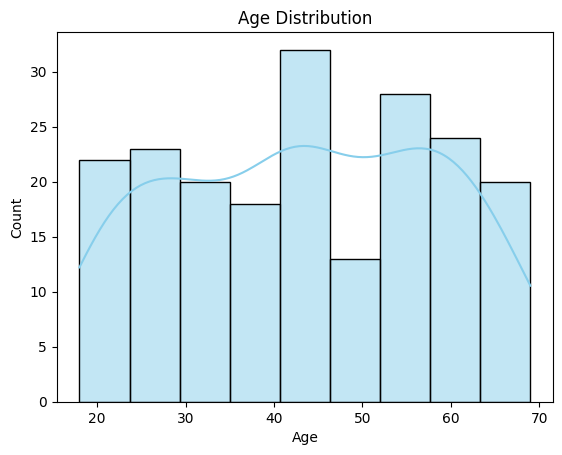

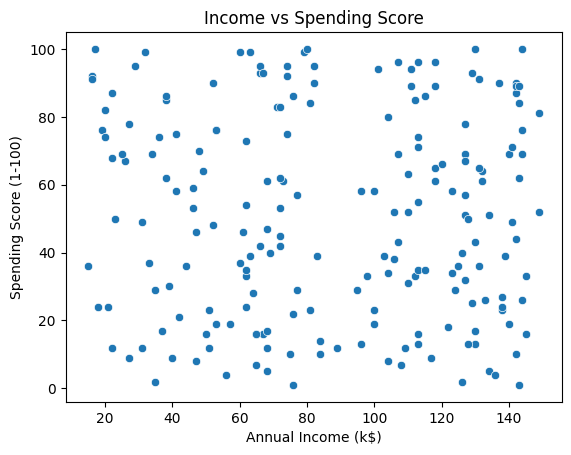

In [5]:
# Age distribution
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()


In [6]:
# Selecting features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


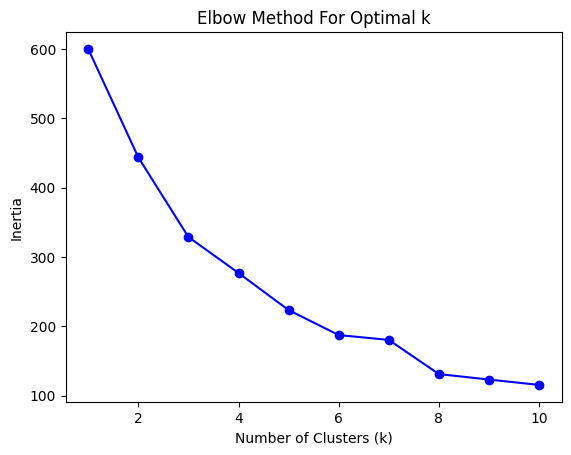

In [7]:
# Elbow method to find best k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [8]:
# From Elbow plot, choose optimal k (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# View sample data with clusters
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,56,76,1,0
1,2,69,65,16,0
2,3,46,73,61,2
3,4,32,132,64,1
4,5,60,110,63,1


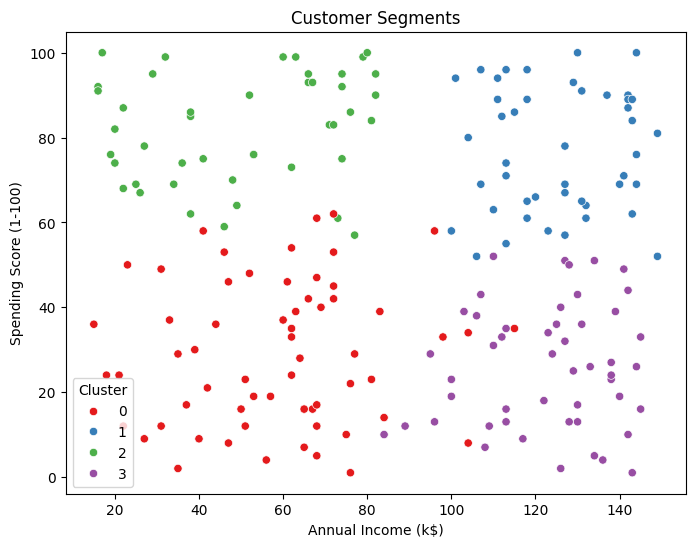

In [9]:
# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()


In [10]:
# Mean values per cluster
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,49.919355,58.612903,28.806452
1,39.044444,125.488889,76.688889
2,42.409091,49.909091,82.181818
3,40.142857,122.918367,25.918367


In [11]:
# Save the result to a new CSV
df.to_csv('segmented_customers.csv', index=False)


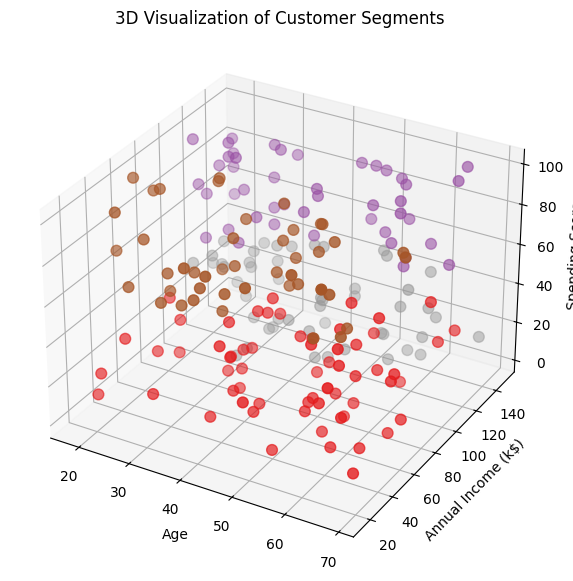

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Cluster'], cmap='Set1', s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
plt.title('3D Visualization of Customer Segments')
plt.show()


In [13]:
!pip install plotly

import plotly.express as px

fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster', title="Interactive 3D Customer Segments")
fig.show()
